In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


Using TensorFlow backend.


In [13]:
x= pd.read_csv("musk_csv.csv", index_col=False)
x=x.drop(columns=["molecule_name", "conformation_name","ID"])

In [14]:
print(x)

      f1   f2   f3   f4   f5   f6   f7   f8   f9  f10  ...  f158  f159  f160  \
0     46 -108  -60  -69 -117   49   38 -161   -8    5  ...  -308    52    -7   
1     41 -188 -145   22 -117   -6   57 -171  -39 -100  ...   -59    -2    52   
2     46 -194 -145   28 -117   73   57 -168  -39  -22  ...  -134  -154    57   
3     41 -188 -145   22 -117   -7   57 -170  -39  -99  ...   -60    -4    52   
4     41 -188 -145   22 -117   -7   57 -170  -39  -99  ...   -60    -4    52   
5     46 -194 -145   28 -117   72   57 -168  -39  -22  ...  -138  -156    56   
6     47 -199 -106   28 -117   73   27 -104  -22  -23  ...  -133  -153    55   
7     41 -199 -101   22 -117   -6   26  -99  -21 -101  ...   -59    -1    50   
8     41 -199 -101   22 -117   -6   26 -100  -21 -101  ...   -59    -1    50   
9     47 -199 -106   28 -117   73   27 -104  -22  -23  ...  -133  -153    55   
10    41 -199 -101   22 -117   -6   26 -100  -21 -101  ...   -59    -1    50   
11    44 -131  -62  -71 -117   54   20 -

In [15]:
x["class"].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [16]:
x=np.array(x)

In [17]:
x

array([[  46, -108,  -60, ..., -112,   96,    1],
       [  41, -188, -145, ..., -136,   79,    1],
       [  46, -194, -145, ..., -145,   39,    1],
       ...,
       [  44, -102,  -19, ..., -144,   -6,    0],
       [  51, -121,  -23, ..., -116,  117,    0],
       [  51, -122,  -23, ..., -115,  118,    0]], dtype=int64)

In [18]:
X = x[:,1:166]
Y = x[:,166]


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [20]:
print(x_train.shape)

(5278, 165)


In [119]:
model = Sequential()
model.add(Dense(25, input_dim=165, activation='relu')) 
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(.2))  #Regularization
model.add(Dense(1, activation='sigmoid')) 


In [120]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [121]:
b=model.fit(x_train, y_train, epochs = 10, batch_size=32, validation_data=(x_test, y_test))

Train on 5278 samples, validate on 1320 samples
Epoch 1/10
5278/5278 [==============================] - 0s 76us/step - loss: 0.6298 - accuracy: 0.8155 - val_loss: 0.2566 - val_accuracy: 0.9015
Epoch 2/10
5278/5278 [==============================] - 0s 41us/step - loss: 0.3008 - accuracy: 0.8859 - val_loss: 0.1962 - val_accuracy: 0.9205
Epoch 3/10
5278/5278 [==============================] - 0s 41us/step - loss: 0.2365 - accuracy: 0.9138 - val_loss: 0.1725 - val_accuracy: 0.9364
Epoch 4/10
5278/5278 [==============================] - 0s 41us/step - loss: 0.1959 - accuracy: 0.9305 - val_loss: 0.1578 - val_accuracy: 0.9356
Epoch 5/10
5278/5278 [==============================] - 0s 41us/step - loss: 0.1788 - accuracy: 0.9305 - val_loss: 0.1184 - val_accuracy: 0.9515
Epoch 6/10
5278/5278 [==============================] - 0s 42us/step - loss: 0.1409 - accuracy: 0.9430 - val_loss: 0.1115 - val_accuracy: 0.9530
Epoch 7/10
5278/5278 [==============================] - 0s 41us/step - loss: 0.136

In [122]:
hist=b.history
print(hist)


{'val_loss': [0.2566323468179414, 0.19615479052969903, 0.17253894525946992, 0.15778052283055854, 0.11844594731475368, 0.11150409967610331, 0.1088754363583796, 0.11372066934903463, 0.08339071644074988, 0.0774014587655212], 'val_accuracy': [0.9015151262283325, 0.9204545617103577, 0.9363636374473572, 0.935606062412262, 0.9515151381492615, 0.9530302882194519, 0.9522727131843567, 0.956818163394928, 0.9681817889213562, 0.9681817889213562], 'loss': [0.6297593181356421, 0.3007821402526254, 0.23654350104228977, 0.19590050489692898, 0.1788145525182635, 0.1409387873678372, 0.13595944057759032, 0.11727596340576055, 0.10231315582290477, 0.09474271162567988], 'accuracy': [0.8154604, 0.8859416, 0.9137931, 0.93046606, 0.93046606, 0.9429708, 0.94524443, 0.9507389, 0.95945436, 0.9617279]}


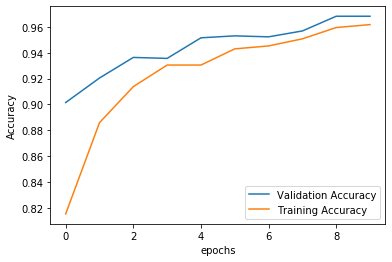

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(hist["val_accuracy"],label="Validation Accuracy")
plt.plot(hist["accuracy"],label="Training Accuracy")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.show()

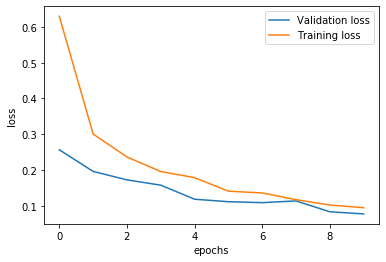

In [124]:
plt.plot(hist["val_loss"],label="Validation loss")
plt.plot(hist["loss"],label="Training loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [125]:
model.evaluate(x_test,y_test)

1320/1320 [==============================] - 0s 23us/step


[0.0774014587655212, 0.9681817889213562]

In [126]:
model.evaluate(x_train,y_train)

5278/5278 [==============================] - 0s 18us/step


[0.06399027963690164, 0.9734748005867004]

In [128]:
model.save("musk classification")